In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import itertools
import random

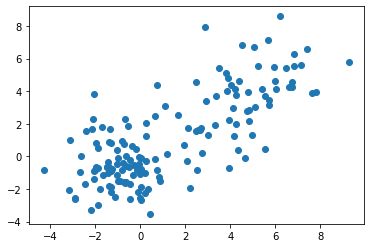

In [2]:
#Read the data
data_clu = pd.read_table('C:/Users/User/Desktop/USC/Machine Learning/HW2/clusters.txt',sep=',',
                         header = None,names = ['x','y'])

plt.scatter(data_clu['x'],data_clu['y'])

In [3]:
def kmeans (data,numb_k,numb_update,min_x,max_x,min_y,max_y):

#Randomly assign the initial centroids
 centroids = random.sample(list(itertools.product(range(min_x, max_x), range(min_y, max_y))), numb_k)    

 for _ in range(numb_update):
    
    #Calculate the distances to centroids from each data entity:
    dist = np.zeros((data.shape[0],numb_k))
    for i in range(len(data)):
        for j in range(len(centroids)):
            dist[i,j] = np.linalg.norm(data.iloc[i]-centroids[j])  
        
    #Find the nearest centroid:
    near_cen = np.zeros((data.shape[0],1)) 
    near_cen = np.argmin(dist,1)  
    
    #Update centroids 
    for cen_i in range(numb_k):
        centroids[cen_i] = np.mean(data[near_cen==cen_i])
 
 #Add to the original data frame the cluster each entity belongs to 
 data_with_cluster = data.join(pd.DataFrame(near_cen,columns=['cluster']),how='outer')

 return centroids,data_with_cluster


          x         y
0  5.384881  4.747021
1 -1.060286 -0.739493
2  2.561971  1.304000
            x         y  cluster
0   -1.861331 -2.991683        1
1   -2.170092 -3.292318        1
2   -1.014081  0.385795        1
3   -2.912943 -2.579539        1
4    0.035721 -0.799698        1
..        ...       ...      ...
145  7.613987  3.886738        0
146  5.699455  3.433903        0
147  4.268830  2.009613        2
148  2.100505  1.734405        2
149  3.808990  5.119568        0

[150 rows x 3 columns]


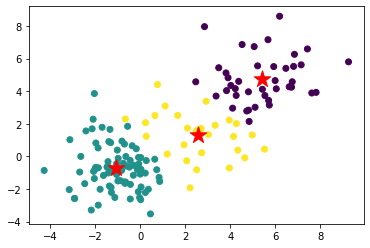

In [5]:
#Iterate the k-means cluster 10 times:
centroids,data_with_cluster=kmeans(data_clu,3,10,-5,10,-5,10)

#Three centroids
centroids

#Store the centroids to dataframe cs 
cs=pd.DataFrame(centroids)

print(cs)

#Print the data with the cluster every entity belongs to 
print(data_with_cluster)

#Plot the diagram 
plt.scatter(data_clu['x'],data_clu['y'],c=data_with_cluster['cluster'])

plt.scatter(cs['x'],cs['y'],marker='*',c='r',s=300)

